# Cyber Security Job Salaries

Cyber Security is at the forefront of business priorities - ensuring that customers can have the trust in sharing their personal data with minimal risk of it being exposed to malicious actors. With this comes a global recruitment race, to craftthe most attractive packages to hire the best candidates into the Cyber teams. Particularly in the past we've seen noticeable discrepancies between Public Sector and Private Sector pay.

In this project I will be performing some Exploratory Data Analysis of Cyber Security Salary information to see if there are any interesting insights that could be taken forward in a separate project or used to influence decision making in this space.

The dataset used in this project can be downloaded from [Kaggle](https://www.kaggle.com/datasets/deepcontractor/cyber-security-salaries). The method of collecting this data is not clear however it can be assumed that this was likely done so via a survey as it contains information about specific employees.

I'll start off by importing some libraries that are useful for data analysis and visualisation. I can then read in the dataset as a DataFrame.

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data = pd.read_csv('salaries_cyber.csv')
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,EN,FT,Cyber Program Manager,63000,USD,63000,US,50,US,S
1,2022,MI,FT,Security Analyst,95000,USD,95000,US,0,US,M
2,2022,MI,FT,Security Analyst,70000,USD,70000,US,0,US,M
3,2022,MI,FT,IT Security Analyst,250000,BRL,48853,BR,50,BR,L
4,2022,EN,CT,Cyber Security Analyst,120000,USD,120000,BW,100,BW,S


From reading in the dataset and looking at the columns that are included, I need a common way to compare salaries. This will be done via the `salary_in_usd` column to ensure the same currency is being used. This makes the `salary` and `salary_currency` columns redundant so I can drop them from our DataFrame.

In [21]:
data.drop(['salary', 'salary_currency'], axis=1, inplace=True)
data.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,EN,FT,Cyber Program Manager,63000,US,50,US,S
1,2022,MI,FT,Security Analyst,95000,US,0,US,M
2,2022,MI,FT,Security Analyst,70000,US,0,US,M
3,2022,MI,FT,IT Security Analyst,48853,BR,50,BR,L
4,2022,EN,CT,Cyber Security Analyst,120000,BW,100,BW,S


In [22]:
data.shape

(1247, 9)

In [23]:
duplicated = data.duplicated()
data[duplicated]

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
77,2022,EN,FT,Data Security Analyst,50000,US,100,US,L
138,2022,MI,FT,Security Engineer,140000,AU,0,AU,M
143,2022,SE,FT,Security Engineer,226400,US,100,US,L
144,2022,SE,FT,Security Engineer,124300,US,100,US,L
159,2022,EN,FT,SOC Analyst,75000,US,100,US,L
...,...,...,...,...,...,...,...,...,...
942,2021,MI,FT,Cyber Security Analyst,90000,US,100,US,L
1035,2021,MI,FT,Information Security Engineer,120000,US,100,US,L
1079,2021,MI,FT,Penetration Tester,100000,US,100,US,M
1110,2021,EN,FT,Cyber Security Analyst,80000,US,50,US,L


As seen above, the dataset consists of 1247 rows and 9 columns.

There also appears to be a number of duplicated rows. The dataset does not include a specific identifying value for each row. Without this information I'm going to err on the side of caution and keep the duplicated values in place, given it is entirely possible that multiple employees may have the same job title and renumeration package.

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1247 entries, 0 to 1246
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           1247 non-null   int64 
 1   experience_level    1247 non-null   object
 2   employment_type     1247 non-null   object
 3   job_title           1247 non-null   object
 4   salary_in_usd       1247 non-null   int64 
 5   employee_residence  1247 non-null   object
 6   remote_ratio        1247 non-null   int64 
 7   company_location    1247 non-null   object
 8   company_size        1247 non-null   object
dtypes: int64(3), object(6)
memory usage: 87.8+ KB


The data is comprised of the following columns:
- `work_year` - year when salary was recorded
- `experience_level` - Entry-level (EN), Mid-level (MI), Senior-level (SE), Executive-level (EX)
- `employment_type` - Part-time (PT), Full-time (FT), Contractor (CT), Freelance (FL)
- `job_title` - title of job role
- `salary_in_usd` - salary converted to USD, if not already
- `employee_residence` - country of residence for employee
- `remote_ratio` - office working (0), hybrid (50), fully remote (100)
- `company_location` - country of company main office
- `company_size` - small (S), medium (M), large (L)

None of the columns contain any null values so I don't need to perform any imputation.

In [25]:
data.describe()

,work_year,salary_in_usd,remote_ratio
count,1247.000000,1247.000000,1247.000000
mean,2021.316760,120278.218925,71.491580
std,0.715501,70291.394942,39.346851
min,2020.000000,2000.000000,0.000000
25%,2021.000000,74594.500000,50.000000
50%,2021.000000,110000.000000,100.000000
75%,2022.000000,150000.000000,100.000000
max,2022.000000,910991.000000,100.000000


The `work_year` column spans from 2020 to 2022.
There is also a very wide range of salaries with an average of `120278`,  although there are some very extreme min and max values.
The `remote_ratio` is more categorical so will focus less on the numbers for that.

## Visualisations

<ipython-input-26-13f78ff1fd14>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap="Blues")


<Axes: >

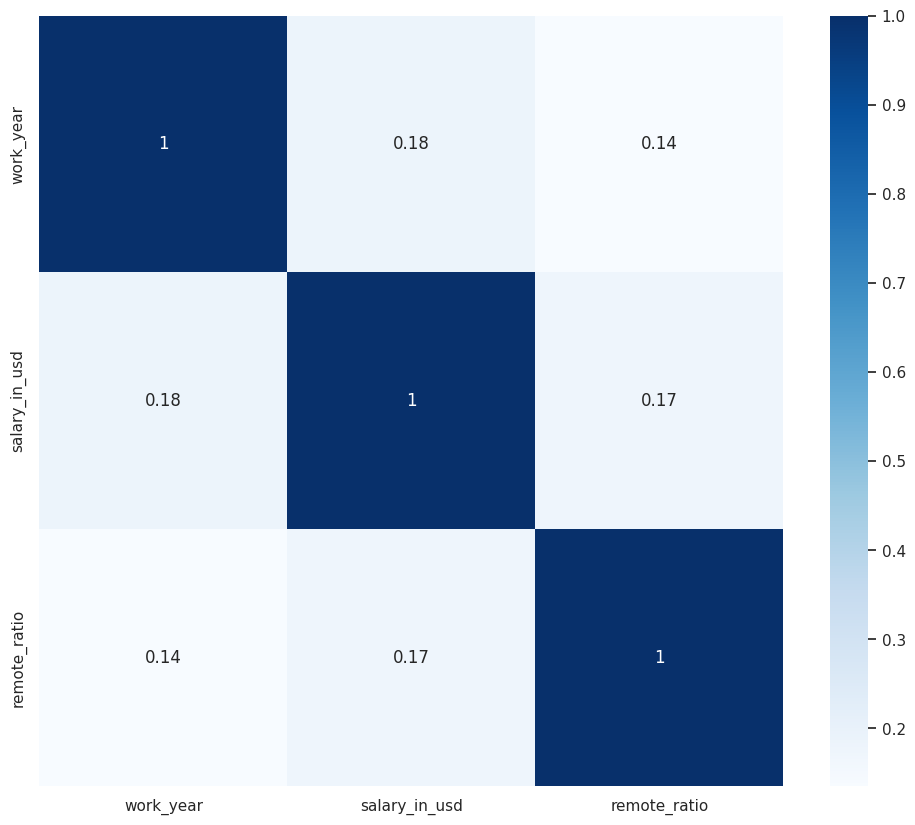

In [26]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot=True, cmap="Blues")

Correlation heatmaps can help to highlight potential correlations between variables. In this case as the only columns other than salary are `work_year` and `remote_ratio`, there isn't anything noteworthy being shown.

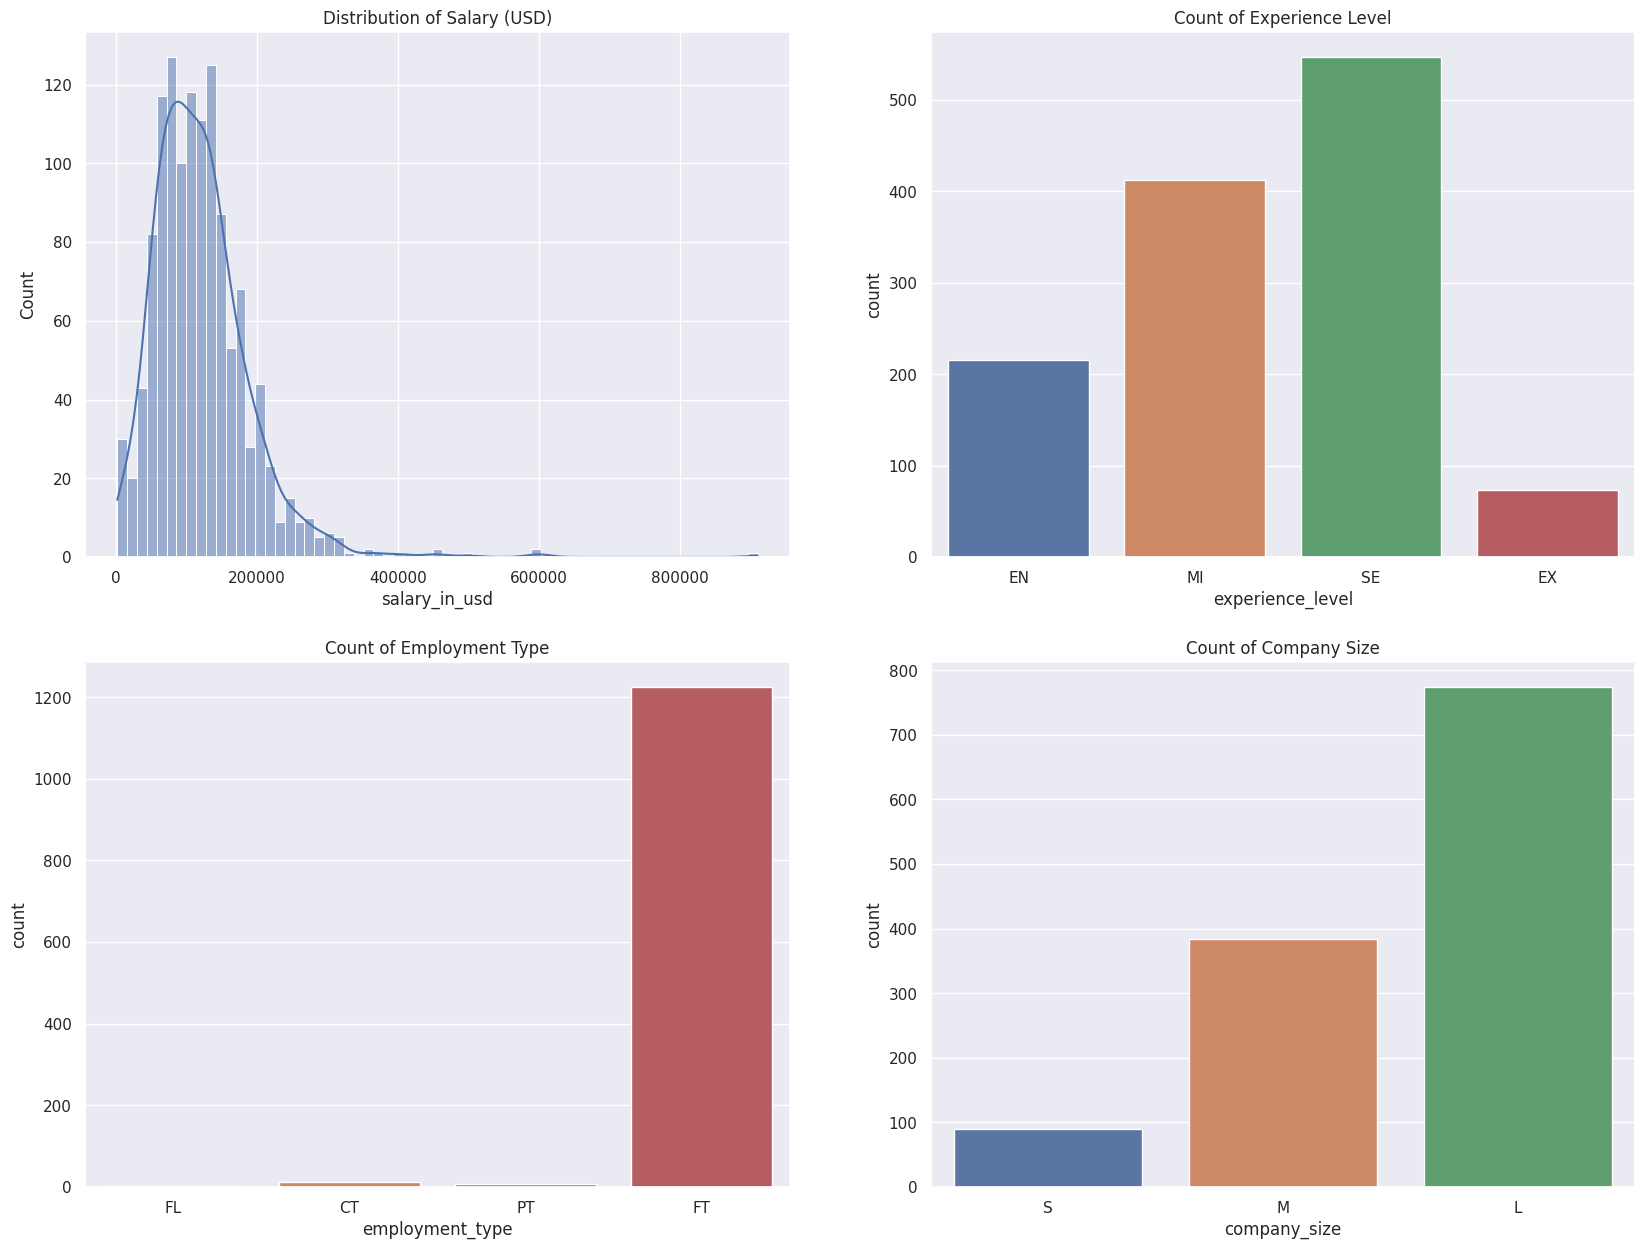

In [27]:
sns.set_theme()

plt.figure(figsize=(20, 15))

plt.subplot(221)
sns.histplot(data['salary_in_usd'], kde=True)
plt.title('Distribution of Salary (USD)')

plt.subplot(222)
sns.countplot(x='experience_level', data=data, order=['EN', 'MI', 'SE', 'EX'])
plt.title('Count of Experience Level')

plt.subplot(223)
sns.countplot(x='employment_type', data=data, order=['FL', 'CT', 'PT', 'FT'])
plt.title('Count of Employment Type')

plt.subplot(224)
sns.countplot(x='company_size', data=data, order=['S', 'M', 'L'])
plt.title('Count of Company Size')

plt.show()

There are several points of note from the above graphs:
- Salary distribution is left-skewed, with a few very high salaries. This is to be expected in the Tech space
- Circa 75% of the data is for Senior and Mid-Level roles, with the other 25% Entry-Level and Executive roles
- Almost all of the roles are full-time
- 2/3 of companies fit into the Large category

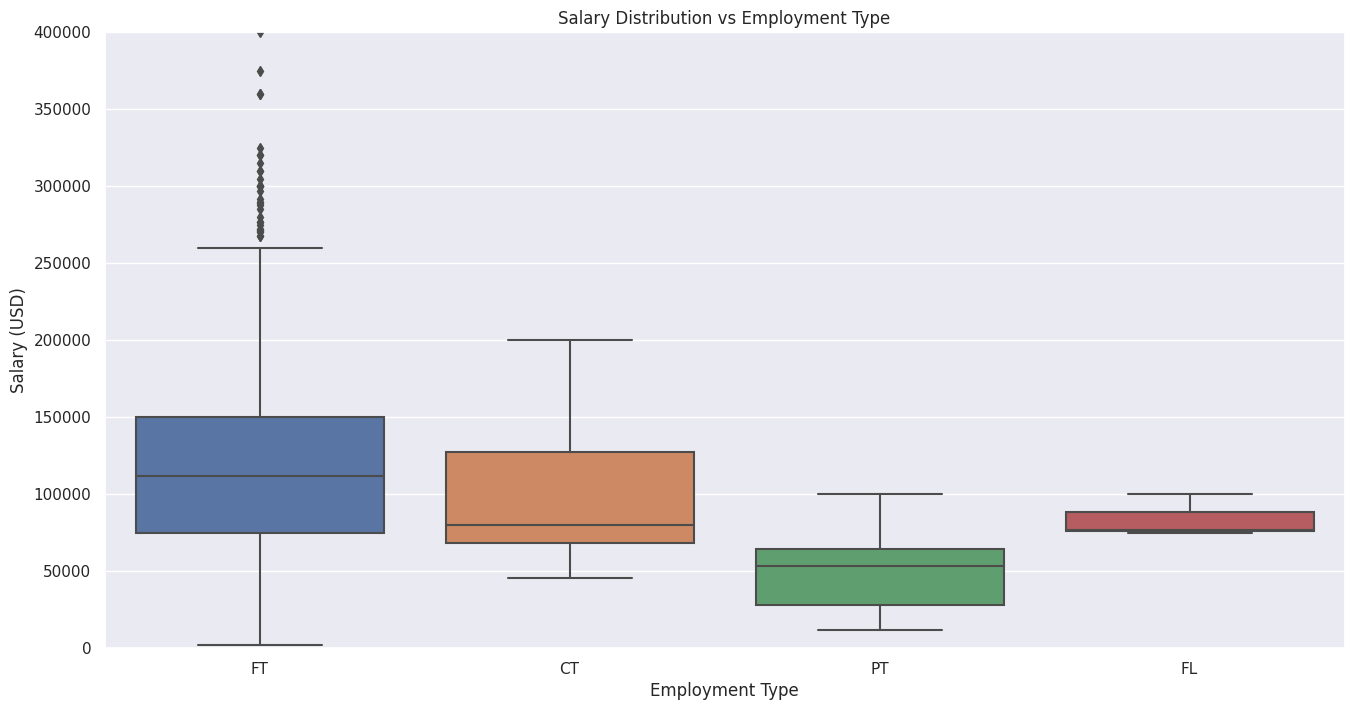

In [28]:
plt.figure(figsize=(16, 8))

sns.boxplot(x='employment_type', y='salary_in_usd', data=data)
plt.xlabel('Employment Type')
plt.ylabel('Salary (USD)')
plt.title('Salary Distribution vs Employment Type')
plt.ylim(0,400000)

plt.show()

Taking a look at salary distribution across the different employment types, I've cut down the y-axis limits however there are several very high value outliers for Full-time employees. Full-time have the highest median salary, which is to be expected.

Contractors have the second highest median however it is unclear whether the salaries have been adjusted pro-rata, as some contracts can last only a few months.

There is much less data for Contractors, Part-time and Freelance so I'm less interested in gaining insights for those.

## Focus on Full-Time Employees

I will now focus solely on Full-Time employees as this is where the bulk of our data is located.

In [29]:
not_fulltime = data[data['employment_type'] != 'FT' ]
data.drop(not_fulltime.index, inplace=True)

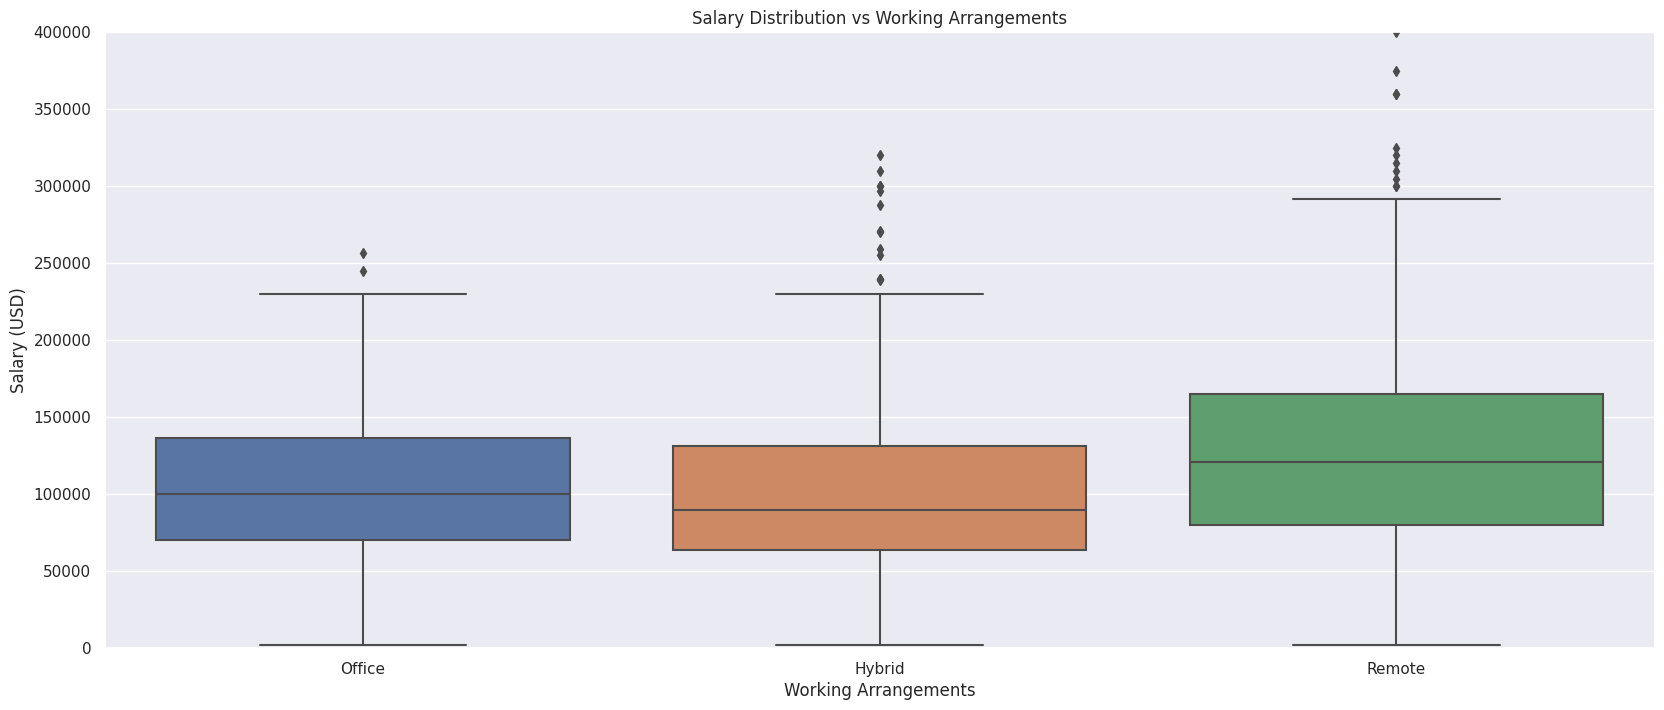

In [30]:
plt.figure(figsize=(20, 8))

sns.boxplot(x='remote_ratio', y='salary_in_usd', data=data)
plt.ylim(0, 400000)
custom_labels = ['Office', 'Hybrid', 'Remote']
plt.xticks(ticks=[0, 1, 2], labels=custom_labels)
plt.xlabel('Working Arrangements')
plt.ylabel('Salary (USD)')
plt.title('Salary Distribution vs Working Arrangements')

plt.show()

Looking at how the salary distribution is affected by working arrangements, the distributions are actually very equal.
The highest median salary sits in the fully Remote category which is something many organisations have adopted since the pandemic. Offering such arrangements can help an organisation to save on other costs such as real estate so this could then be invested by into renumeration packages.

In [31]:
data['remote_ratio'].value_counts(normalize=True)

100    0.615510
50     0.195918
0      0.188571
Name: remote_ratio, dtype: float64

62% of the job roles in this dataset are fully remote, with the remainder split between hybrid and office working.

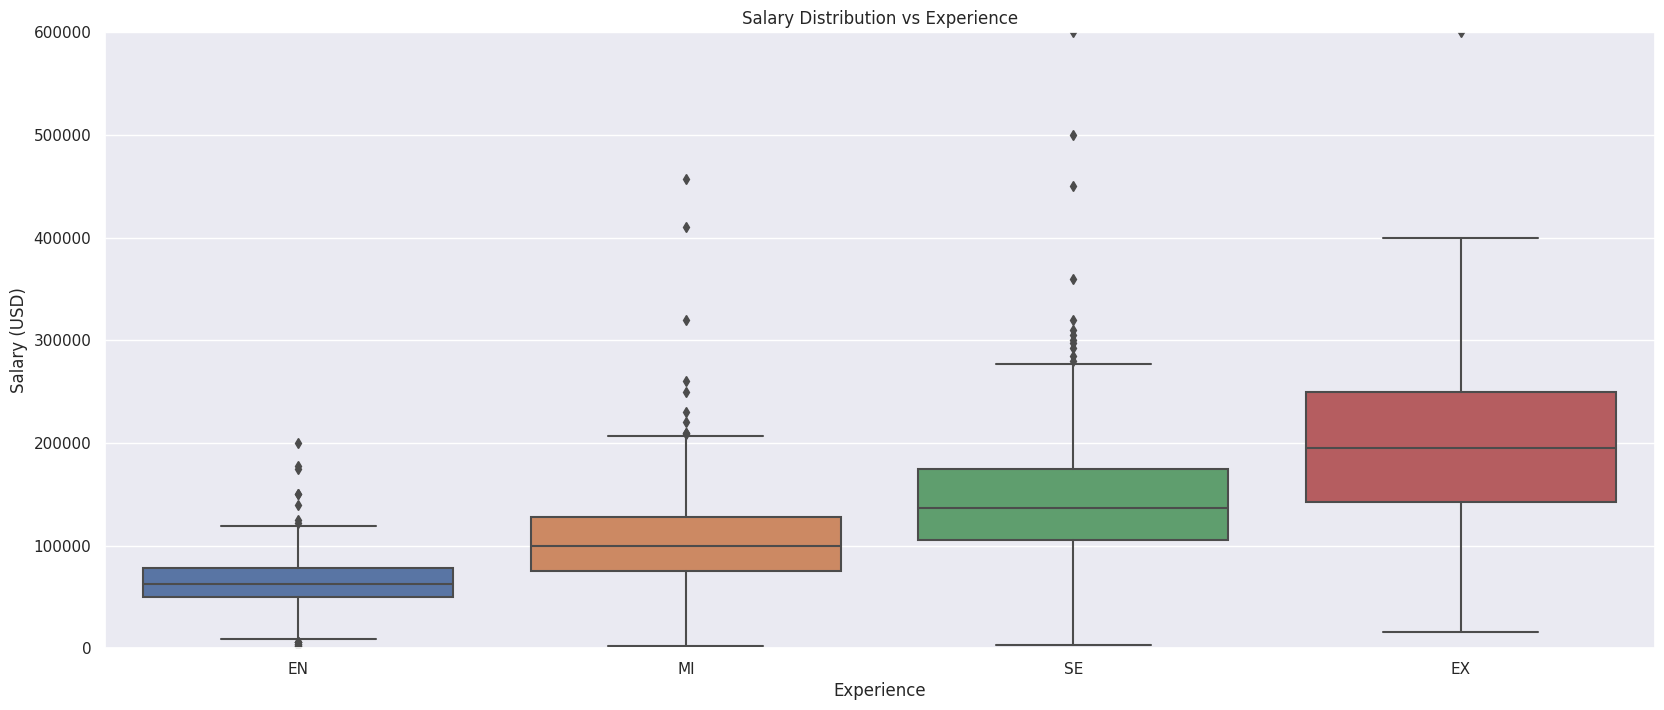

In [32]:
plt.figure(figsize=(20, 8))

sns.boxplot(x='experience_level', y='salary_in_usd', data=data,  order=['EN', 'MI', 'SE', 'EX'])
plt.ylim(0,600000)
plt.xlabel('Experience')
plt.ylabel('Salary (USD)')
plt.title('Salary Distribution vs Experience')

plt.show()

I've set the y-limits again to cut off some of the outliers at the top, to visualise the distributions more easily.

The distributions scale nicely as you move up the levels of experience. Median salaries increase in turn along with the IQR and ranges.

Interestingly it appears that the 25% mark for `ML`, `SE` and `EX` line up very closely with the previous level's median point.

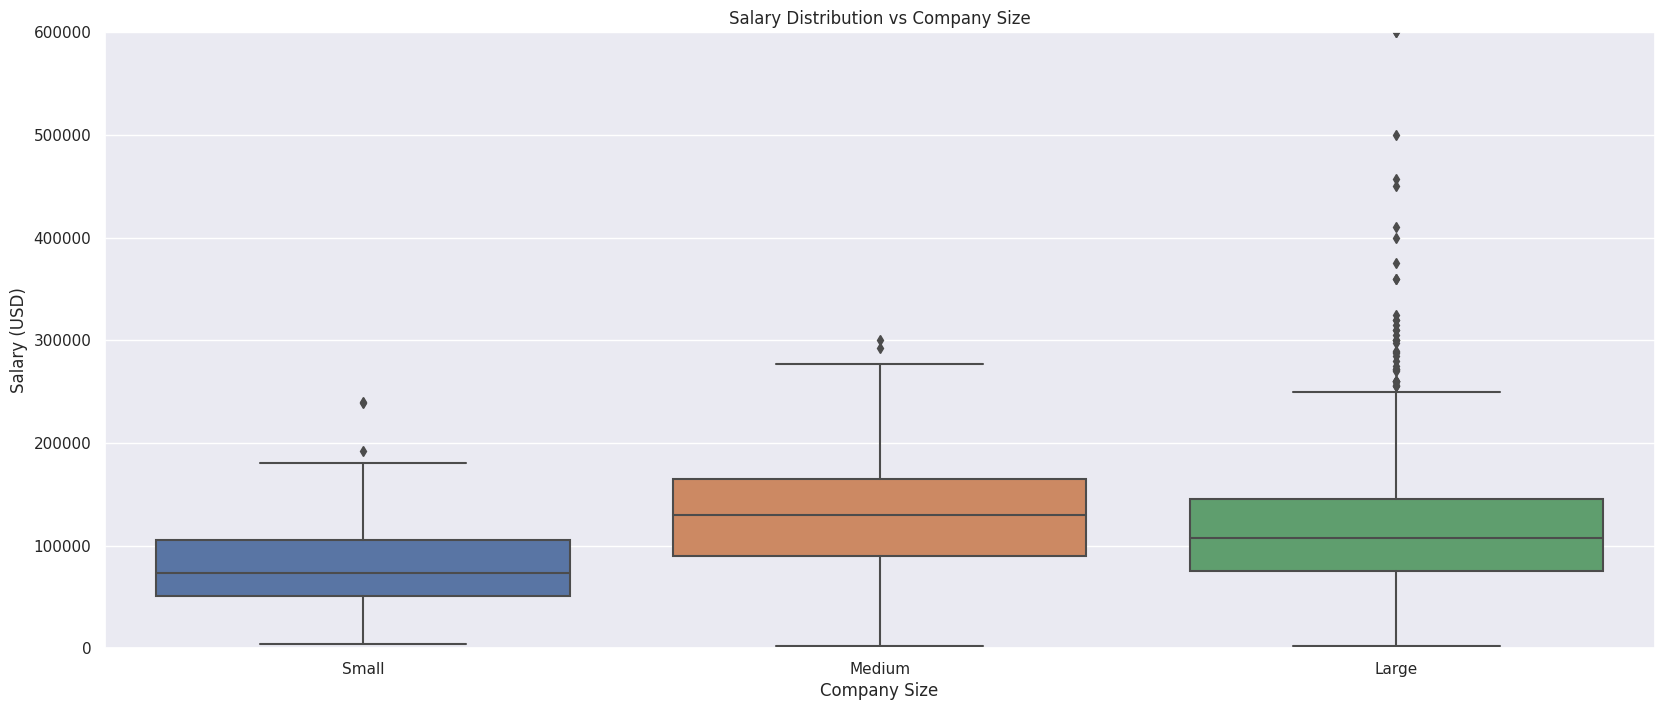

In [33]:
plt.figure(figsize=(20, 8))

sns.boxplot(x='company_size', y='salary_in_usd', data=data)
custom_labels = ['Small', 'Medium', 'Large']
plt.xticks(ticks=[0, 1, 2], labels=custom_labels)
plt.ylim(0,600000)
plt.xlabel('Company Size')
plt.ylabel('Salary (USD)')
plt.title('Salary Distribution vs Company Size')

plt.show()

In [34]:
data['company_size'].value_counts(normalize=True)

L    0.623673
M    0.308571
S    0.067755
Name: company_size, dtype: float64

Interestingly the `Medium` sized companies appear to be paying more on average than `Large` organisations, the exception to this being that there are far more higher outliers for `Large`.

`Small` organisations make up less than 7% of the data so the distribution in this level may not be so well supported.

## Job Grades - Full-Time

Finally I want to see how easy it is to extract insights from the data based upon the grade/rank of the role.

Generally (although not always), you can infer the seniority and responsibilities of a Cyber role based upon the last word in the job title. e.g. Manager, Analyst...

With this in mind I will try to extract this data.

In [35]:
data['job_title'].value_counts()[:20].index

Index(['Security Engineer', 'Cyber Security Analyst', 'Penetration Tester',
       'Information Security Manager', 'Cyber Security Engineer',
       'Security Analyst', 'Information Security Analyst',
       'Cyber Threat Intelligence Analyst', 'Cyber Security Specialist',
       'Information Security Officer', 'SOC Analyst',
       'Chief Information Security Officer', 'Cyber Security Architect',
       'Application Security Engineer', 'DevSecOps Engineer',
       'Information Security Engineer', 'Incident Response Analyst',
       'Security Specialist', 'Information Security Specialist',
       'Information Security Architect'],
      dtype='object')

I will create a new column `job_rank` which will store the final word of each entry in the `job_title` column.

In [36]:
data['job_rank'] = data['job_title'].str.split().str[-1]

In [37]:
data['job_rank'].value_counts()

Engineer      457
Analyst       351
Manager       103
Tester         68
Specialist     66
Officer        54
Architect      48
Researcher     23
Security       21
Consultant     15
Lead            9
Hacker          8
Hunter          1
3               1
Name: job_rank, dtype: int64

Looking at the unique values, there are some random entries such as `3` which don't make sense. For the scope of this initial analysis, I don't want to spend too much time cleaning the data. Instead I will see if there are any insights I can gain from looking at the most popular ranks - in this case the 4 most frequent.

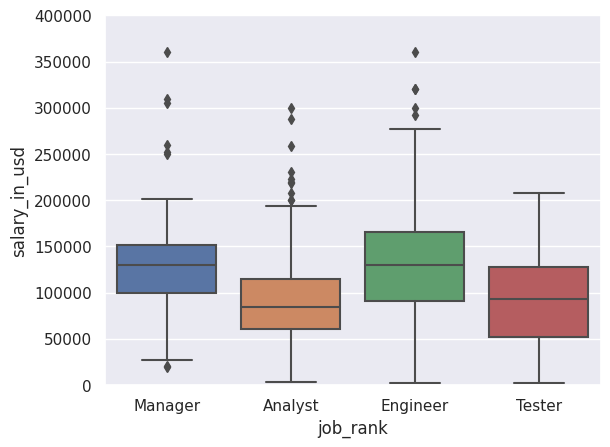

In [38]:
most_popular_ranks = data.copy()
most_popular_ranks = most_popular_ranks[
    (most_popular_ranks['job_rank'] == 'Engineer') |
    (most_popular_ranks['job_rank'] == 'Analyst') |
    (most_popular_ranks['job_rank'] == 'Manager') |
    (most_popular_ranks['job_rank'] == 'Tester')
]

sns.boxplot(x='job_rank', y='salary_in_usd', data=most_popular_ranks)
plt.ylim(0,400000)
plt.show()

Of the most popular ranks we can see that `Analyst` distributions are lowest which makes sense as generally they can consist of many entry-level roles. `Manager` and `Engineer` are very similar in terms of their median salaries. You are more likely to find technical expertise in an Engineer role as you are in a Managerial role, although this isn't always true.

## Next Steps

Some of the exploratory insights could be used in their current form to influence recuritment practices. It may also be worthwhile looking for data with a broader range of features and looking for any other influences on salary.

If there is enough data and features then it may be worth exploring the use of Machine Learning in order to predict salary points and evaluate against current market rates.